In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
df=pd.read_csv('household_power_consumption.csv')
df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


In [43]:
df.replace('?', np.nan, inplace=True)

In [45]:
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [47]:
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [49]:
df.dropna(inplace=True)

In [63]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='mixed', dayfirst=True)


In [65]:
df.set_index('Datetime', inplace=True)

In [67]:
df.drop(columns=['Date', 'Time', 'index'], errors='ignore', inplace=True)


In [69]:
df.sort_index(inplace=True)

In [71]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek

In [73]:
features = ['Global_reactive_power', 'Voltage', 'Global_intensity','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'hour', 'day', 'month', 'day_of_week']

X = df[features]
y = df['Global_active_power']

In [75]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Create and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [78]:
y_pred = model.predict(X_test)

In [79]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

C:\Users\Sehwag\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
print("📈 Model Evaluation Metrics")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

📈 Model Evaluation Metrics
Mean Absolute Error (MAE): 0.012
Root Mean Squared Error (RMSE): 0.028


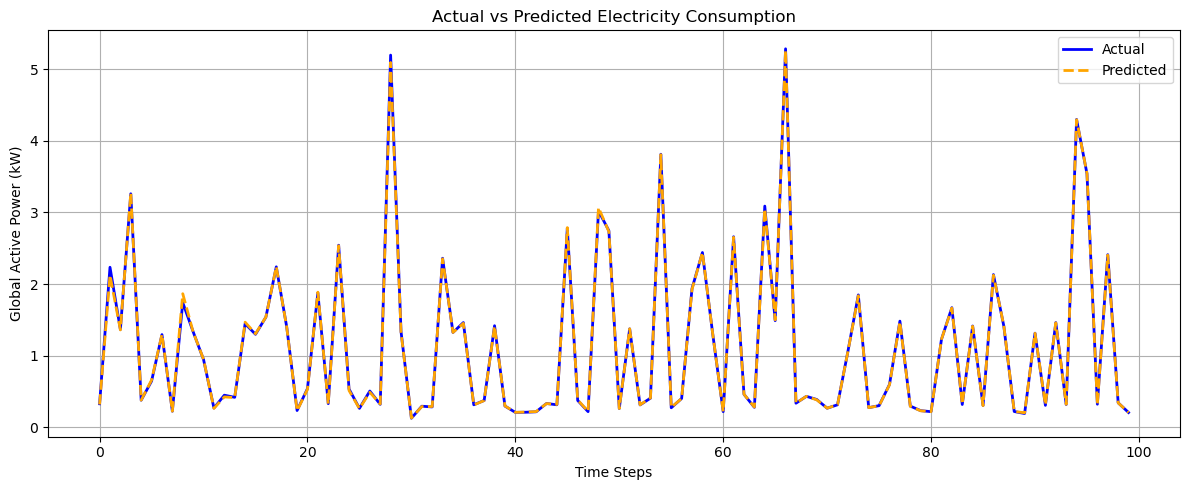

In [81]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label="Actual", color="blue", linewidth=2)
plt.plot(y_pred[:100], label="Predicted", color="orange", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Electricity Consumption")
plt.xlabel("Time Steps")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.5 MB/s eta 0:01:39
   ---------------------------------------- 0.8/150.0 MB 1.5 MB/s eta 0:01:38
   ---------------------------------------- 1.3/150.0 MB 1.7 MB/s eta 0:01:27
   ---------------------------------------- 1.6/150.0 MB 1.8 MB/s eta 0:01:22
    --------------------------------------- 2.1/150.0 MB 1.8 MB/s eta 0:01:21
    --------------------------------------- 2.6/150.0 MB 1.9 MB/s eta 0:01:19
    --------------------------------------- 3.1/150.0 MB 2.0 MB/s eta 0:01:14
    --------------------------------------- 3.7/150.0 MB 2.1 MB/s eta 0:01:10
   - -------------------------------------- 4.2/150.0 MB 2.2 MB/s eta 0:01:08
   - -------------------------------------- 5.0/150.0 MB 2.4 MB/s eta 0:01:02
   - -------------------------------------- 5.8/150.0 MB 2.4 MB/s eta 0:01:00


In [93]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [97]:
df.replace("?", np.nan, inplace=True)
df = df.dropna()
df.iloc[:, 3:] = df.iloc[:, 3:].astype(float)

C:\Users\Sehwag\AppData\Local\Temp\ipykernel_1908\565693070.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Datetime
2007-01-01 00:00:00     0.0
2007-01-01 00:01:00     0.0
2007-01-01 00:02:00     0.0
2007-01-01 00:03:00     0.0
2007-01-01 00:04:00     0.0
                       ... 
2007-06-30 23:55:00    23.0
2007-06-30 23:56:00    23.0
2007-06-30 23:57:00    23.0
2007-06-30 23:58:00    23.0
2007-06-30 23:59:00    23.0
Name: hour, Length: 256869, dtype: float64' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.iloc[:, 3:] = df.iloc[:, 3:].astype(float)
C:\Users\Sehwag\AppData\Local\Temp\ipykernel_1908\565693070.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Datetime
2007-01-01 00:00:00     1.0
2007-01-01 00:01:00     1.0
2007-01-01 00:02:00     1.0
2007-01-01 00:03:00     1.0
2007-01-01 00:0

In [101]:
df.drop(["Date", "Time", "index"], axis=1, errors="ignore", inplace=True)

In [103]:
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month


In [105]:
X = df.drop("Global_active_power", axis=1)
y = df["Global_active_power"]


In [107]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [109]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [111]:
def evaluate(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{model_name} -> MAE: {mae:.3f}, RMSE: {rmse:.3f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_xgb, "XGBoost")


Linear Regression -> MAE: 0.028, RMSE: 0.044
XGBoost -> MAE: 0.018, RMSE: 0.031


C:\Users\Sehwag\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Sehwag\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


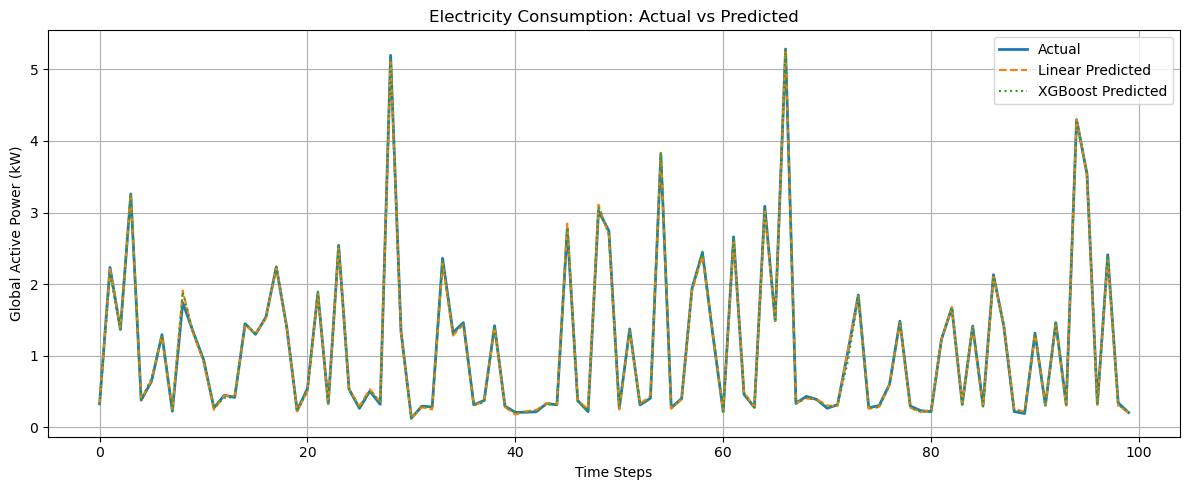

In [113]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label="Actual", linewidth=2)
plt.plot(y_pred_lr[:100], label="Linear Predicted", linestyle="--")
plt.plot(y_pred_xgb[:100], label="XGBoost Predicted", linestyle=":")
plt.legend()
plt.title("Electricity Consumption: Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Global Active Power (kW)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [115]:
from sklearn.tree import DecisionTreeRegressor


In [117]:
# Create and train the decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [153]:
X_test

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,day_of_week
Datetime,,,,,,,,,,
2007-02-14 00:26:00,0.132,245.59,1.4,0.0,2.0,0.0,0,14,2,2
2007-06-08 13:57:00,0.148,235.17,9.4,0.0,16.0,17.0,13,8,6,4
2007-01-15 12:09:00,0.000,242.29,5.6,0.0,0.0,18.0,12,15,1,0
2007-02-11 19:24:00,0.374,233.23,14.0,0.0,1.0,17.0,19,11,2,6
2007-05-26 00:20:00,0.194,239.54,1.8,0.0,1.0,0.0,0,26,5,5
...,...,...,...,...,...,...,...,...,...,...
2007-03-07 15:00:00,0.000,241.84,5.2,0.0,0.0,18.0,15,7,3,2
2007-01-29 15:06:00,0.132,244.00,5.8,0.0,0.0,19.0,15,29,1,0
2007-01-20 20:32:00,0.092,236.80,15.6,0.0,0.0,18.0,20,20,1,5


In [163]:
# Predict on test data
y_pred_dt = dt_model.predict([[0.132	,245.59	,1.4	,0.0	,2.0	,0.0,0,14,2,2]])
y_pred_dt


C:\Users\Sehwag\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.314])

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

print(f"📊 Decision Tree MAE: {mae_dt:.3f}")
print(f"📊 Decision Tree RMSE: {rmse_dt:.3f}")


📊 Decision Tree MAE: 0.015
📊 Decision Tree RMSE: 0.039


C:\Users\Sehwag\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


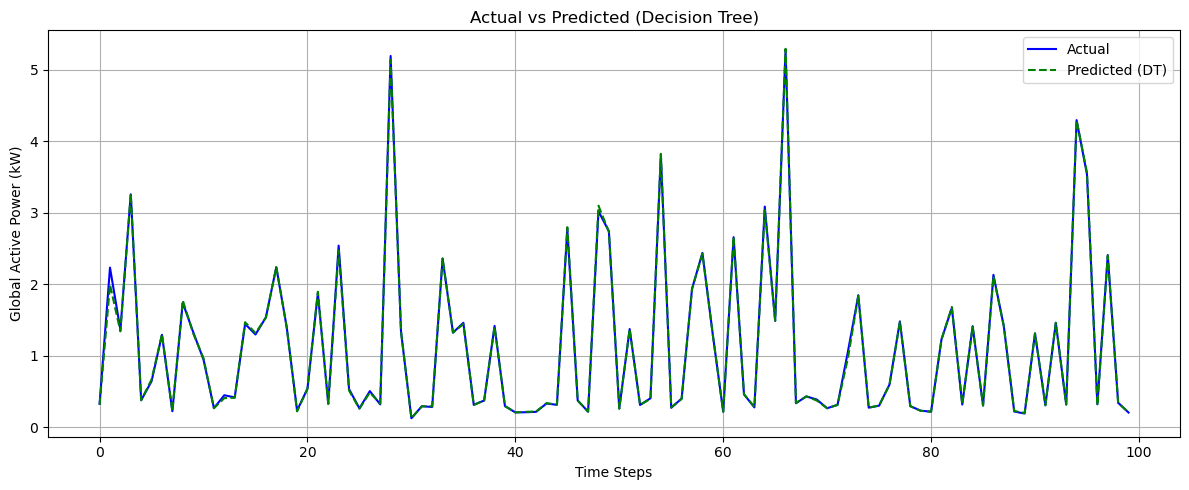

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual', color='blue')
plt.plot(y_pred_dt[:100], label='Predicted (DT)', color='green', linestyle='--')
plt.title('Actual vs Predicted (Decision Tree)')
plt.xlabel('Time Steps')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


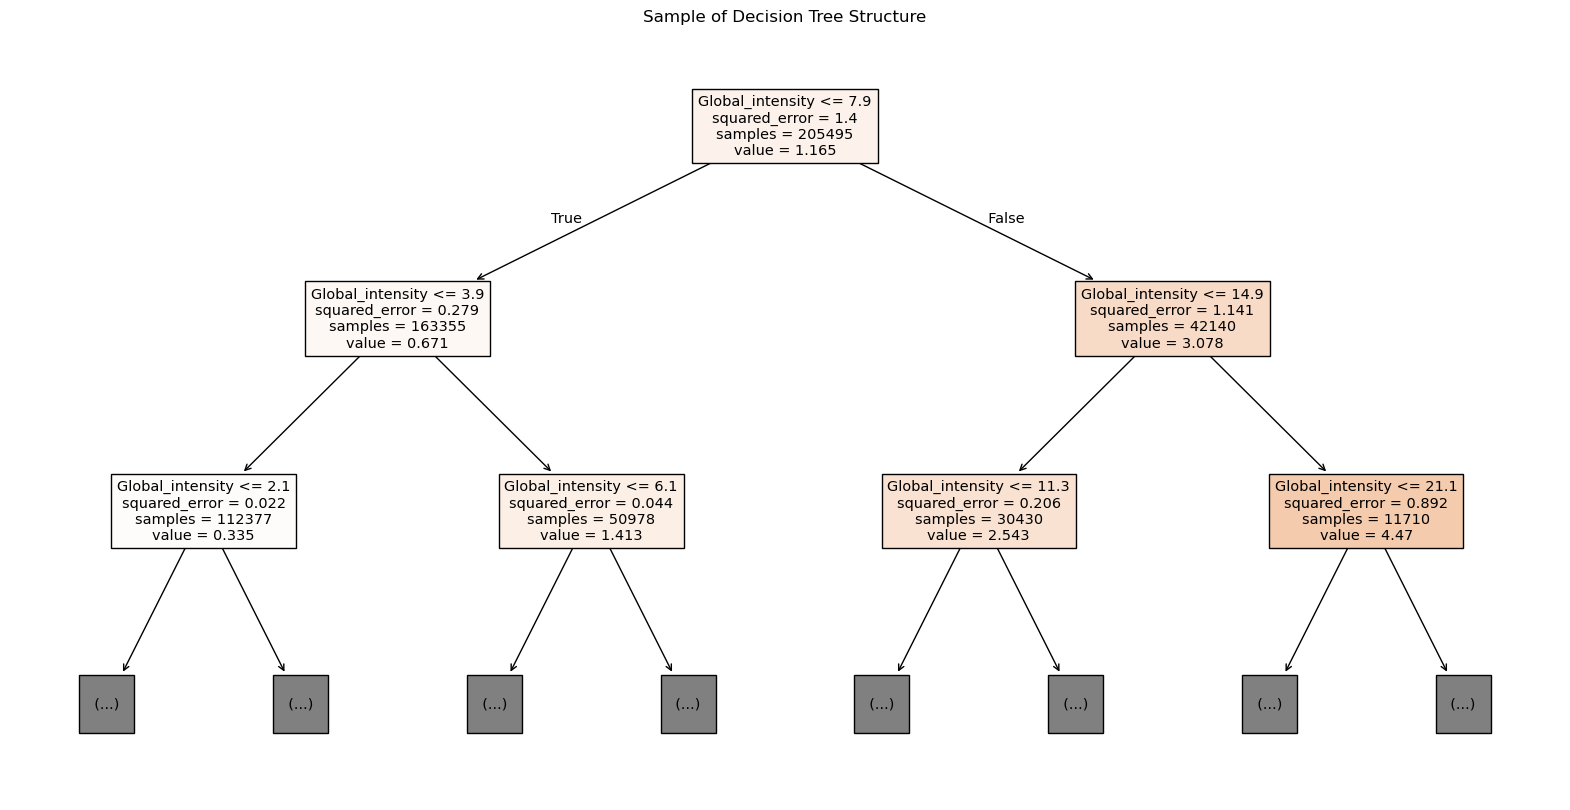

In [125]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=X_train.columns, max_depth=2)
plt.title("Sample of Decision Tree Structure")
plt.show()


In [127]:
import seaborn as sns
import matplotlib.pyplot as plt


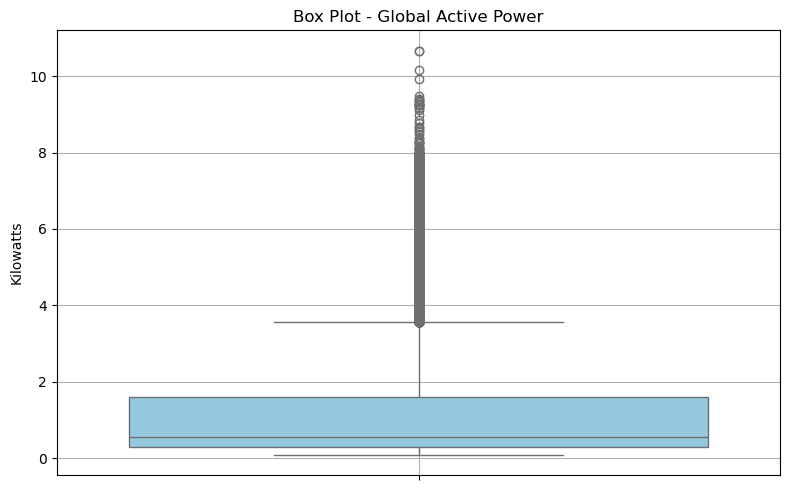

In [129]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Global_active_power', color='skyblue')
plt.title('Box Plot - Global Active Power')
plt.ylabel('Kilowatts')
plt.grid(True)
plt.tight_layout()
plt.show()


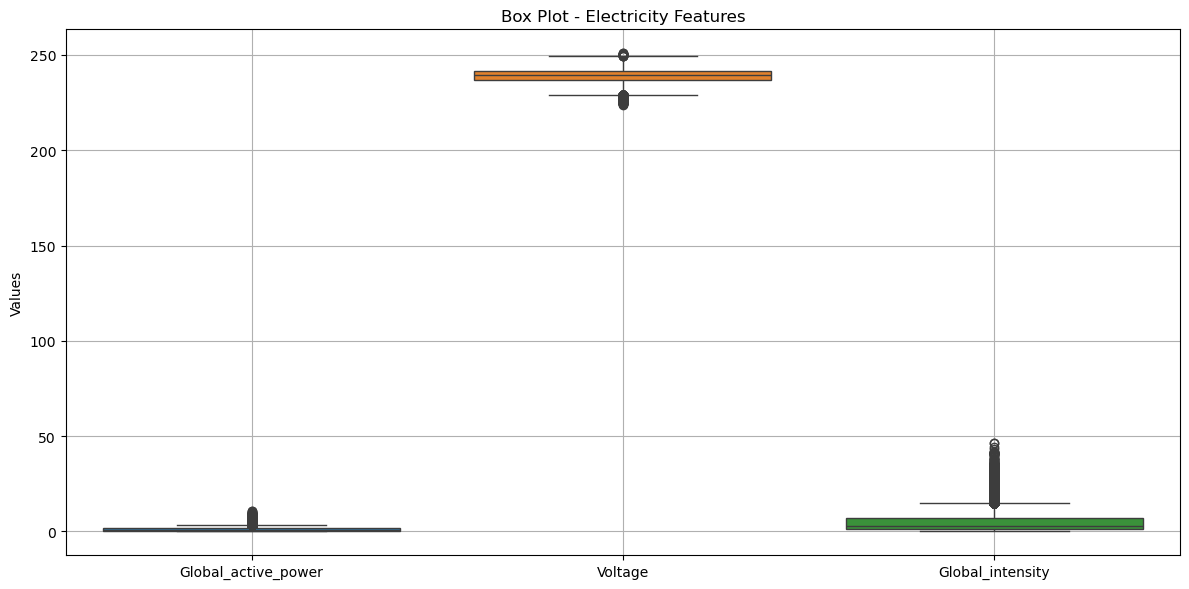

In [131]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Global_active_power', 'Voltage', 'Global_intensity']])
plt.title('Box Plot - Electricity Features')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()
plt.show()


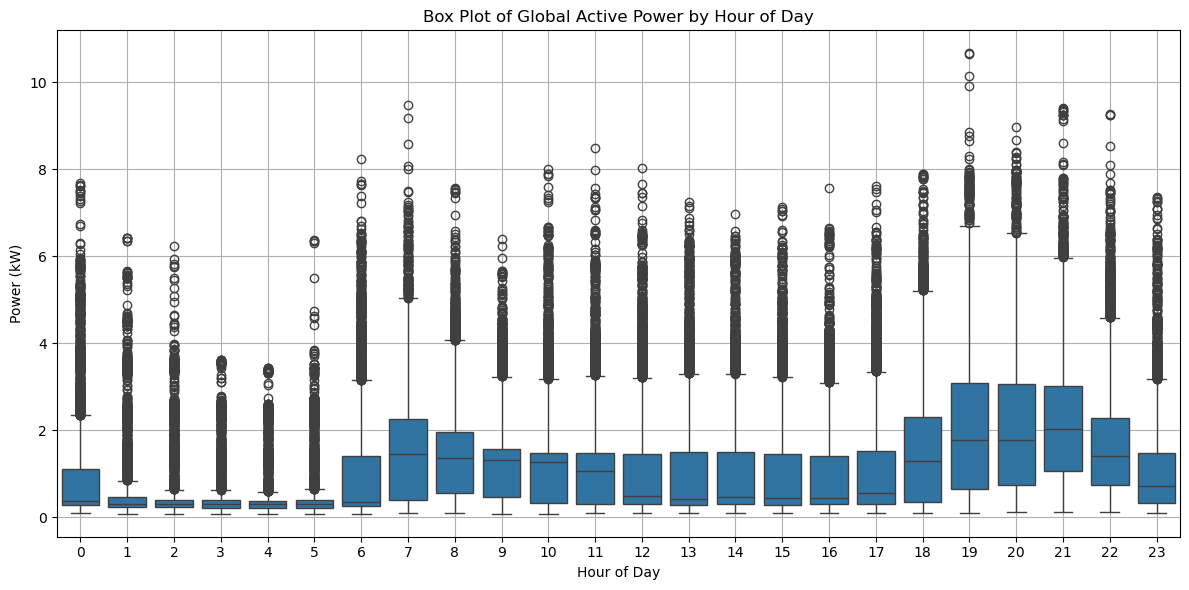

In [133]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='Global_active_power', data=df)
plt.title('Box Plot of Global Active Power by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Sehwag\AppData\Local\Temp\ipykernel_1908\3874234099.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sehwag\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


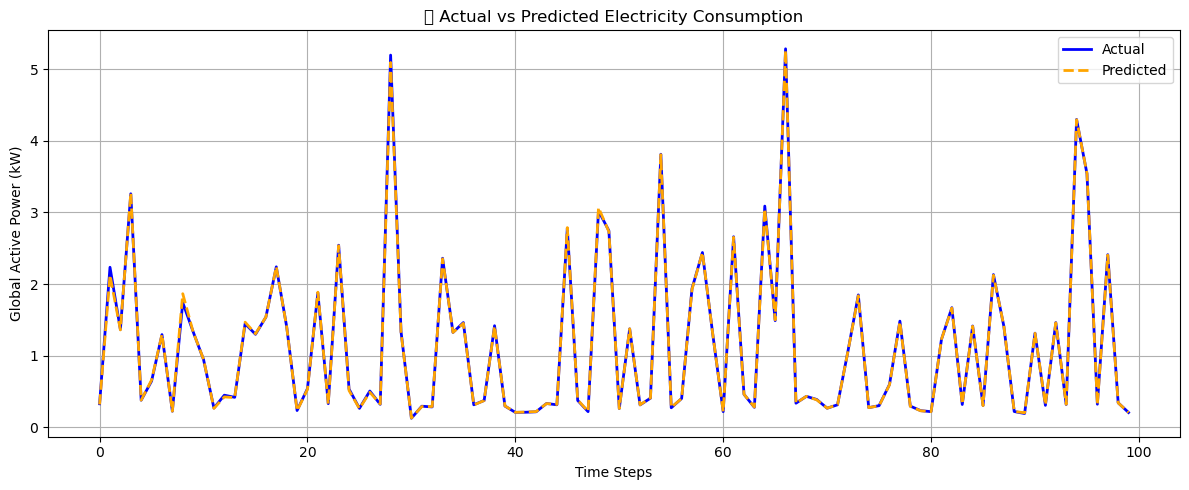

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual', color='blue', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('📈 Actual vs Predicted Electricity Consumption')
plt.xlabel('Time Steps')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Sehwag\AppData\Local\Temp\ipykernel_1908\2588598014.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sehwag\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


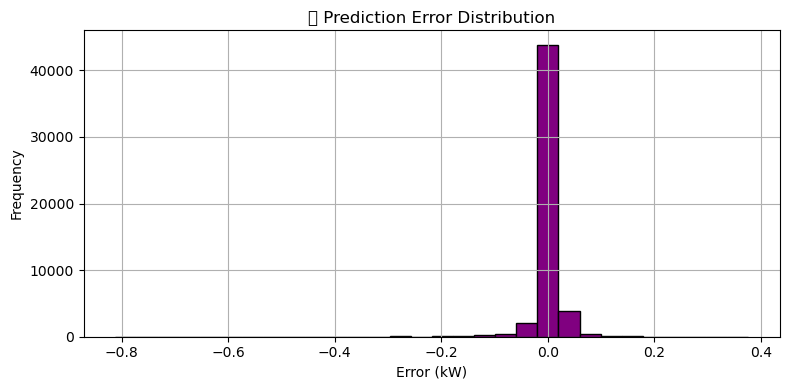

In [137]:
errors = y_test - y_pred

plt.figure(figsize=(8, 4))
plt.hist(errors, bins=30, color='purple', edgecolor='black')
plt.title('📊 Prediction Error Distribution')
plt.xlabel('Error (kW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Sehwag\AppData\Local\Temp\ipykernel_1908\834622791.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette='viridis')
C:\Users\Sehwag\AppData\Local\Temp\ipykernel_1908\834622791.py:9: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sehwag\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


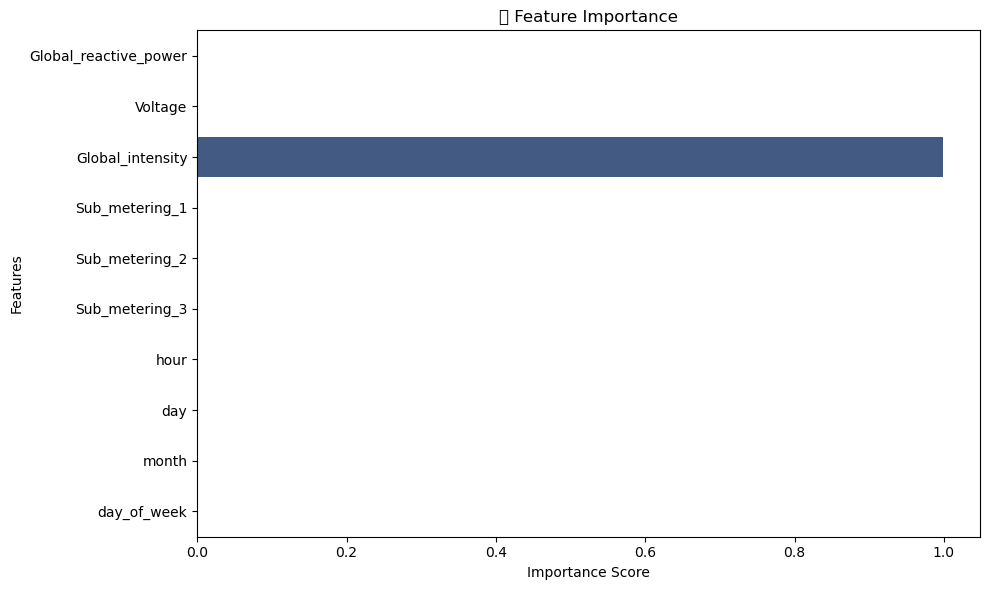

In [139]:
importance = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names, palette='viridis')
plt.title("🌟 Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

C:\Users\Sehwag\AppData\Local\Temp\ipykernel_1908\676310990.py:7: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sehwag\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sehwag\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


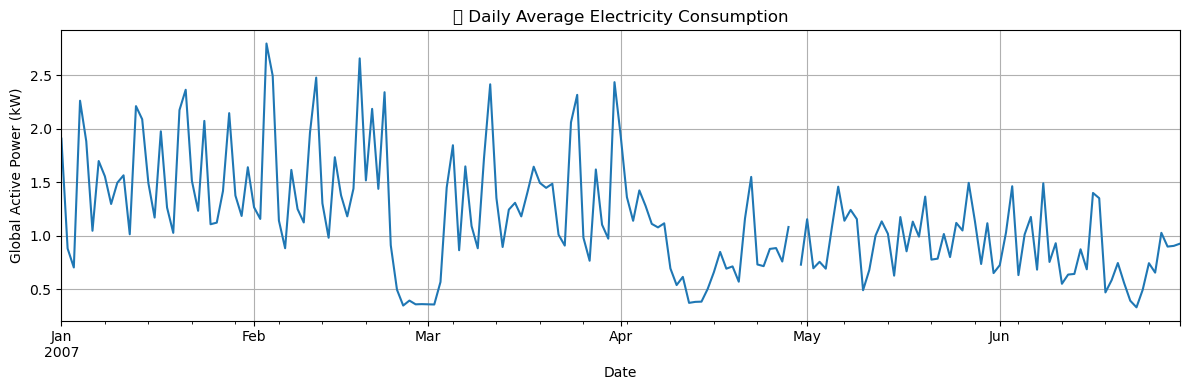

In [141]:
plt.figure(figsize=(12, 4))
df['Global_active_power'].resample('D').mean().plot()
plt.title("🔌 Daily Average Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Global Active Power (kW)")
plt.grid(True)
plt.tight_layout()
plt.show()


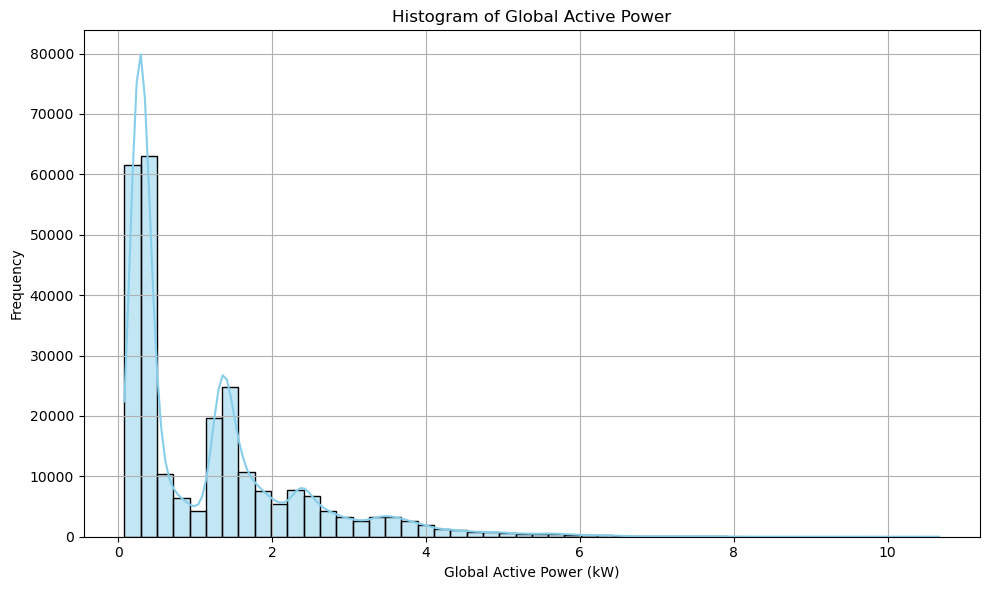

In [143]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_active_power'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Sehwag\AppData\Local\Temp\ipykernel_1908\2760784398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='hour', y='Global_active_power', data=df.sample(1000), palette='viridis', size=3)
C:\Users\Sehwag\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sehwag\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sehwag\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings

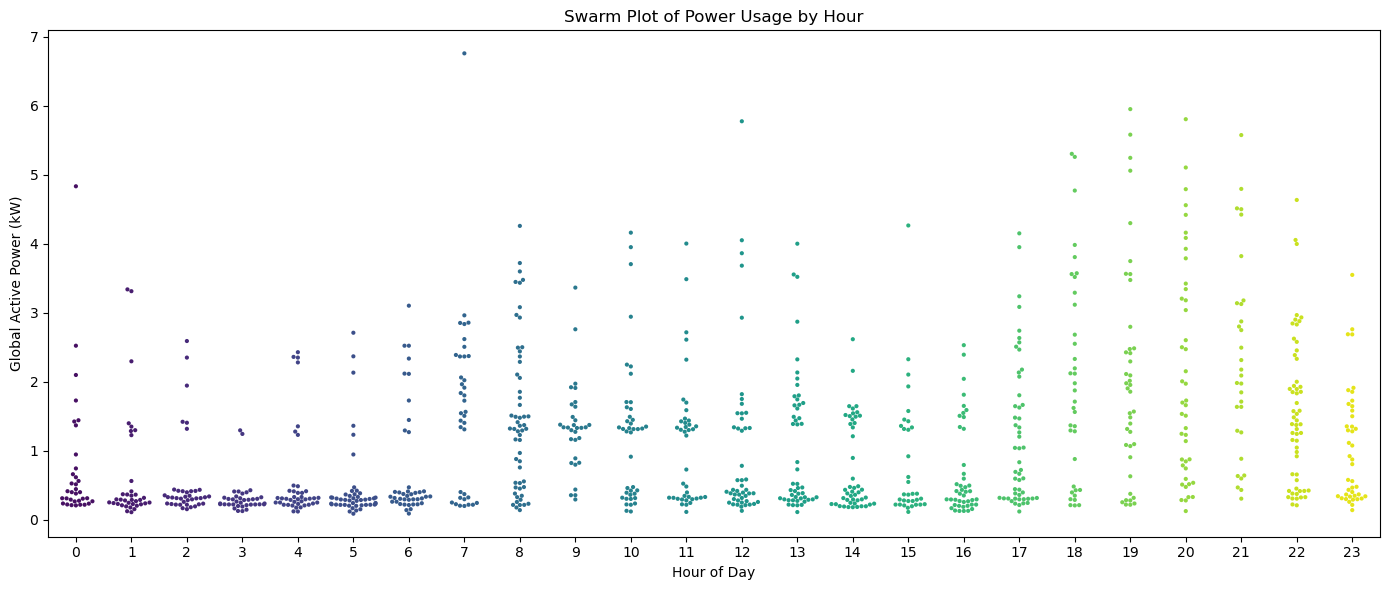

In [145]:
plt.figure(figsize=(14, 6))
sns.swarmplot(x='hour', y='Global_active_power', data=df.sample(1000), palette='viridis', size=3)
plt.title('Swarm Plot of Power Usage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Global Active Power (kW)')
plt.tight_layout()
plt.show()


C:\Users\Sehwag\AppData\Local\Temp\ipykernel_1908\1340030714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dayofweek', data=df, palette='pastel')


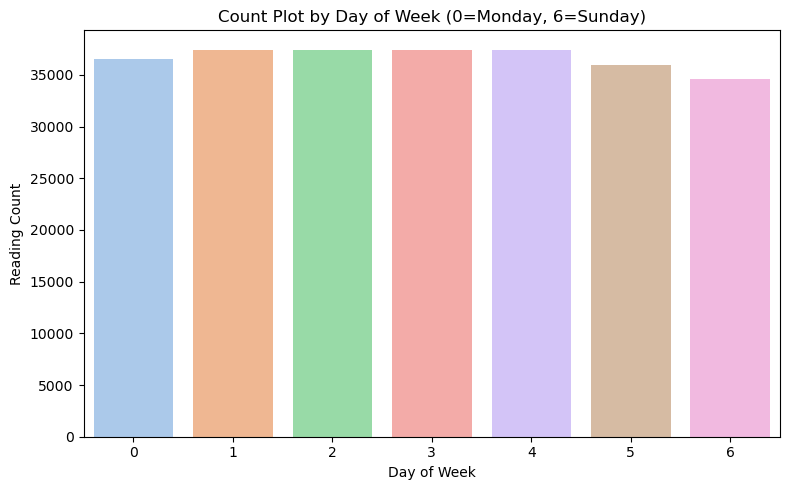

In [147]:
plt.figure(figsize=(8, 5))
sns.countplot(x='dayofweek', data=df, palette='pastel')
plt.title('Count Plot by Day of Week (0=Monday, 6=Sunday)')
plt.xlabel('Day of Week')
plt.ylabel('Reading Count')
plt.tight_layout()
plt.show()
